# Digital content Management

In [1]:
import numpy as np 
import pandas as pd

## Data loading and Data analysis

In [2]:
blog_df = pd.read_csv("/NLP/NLP_project_1/blogs/blogtext.csv", nrows = 100000)

In [3]:
blog_df.shape

(100000, 7)

In [4]:
import pandas as pd
import re

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
blog_df.tail(5)

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


In [7]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [8]:
blog_df.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

In [9]:
blog_df.sign.value_counts()

Aries          10637
Cancer          9253
Gemini          9225
Aquarius        9050
Capricorn       8723
Taurus          8530
Leo             8230
Pisces          7553
Sagittarius     7366
Libra           7250
Virgo           7134
Scorpio         7049
Name: sign, dtype: int64

<AxesSubplot:xlabel='sign', ylabel='count'>

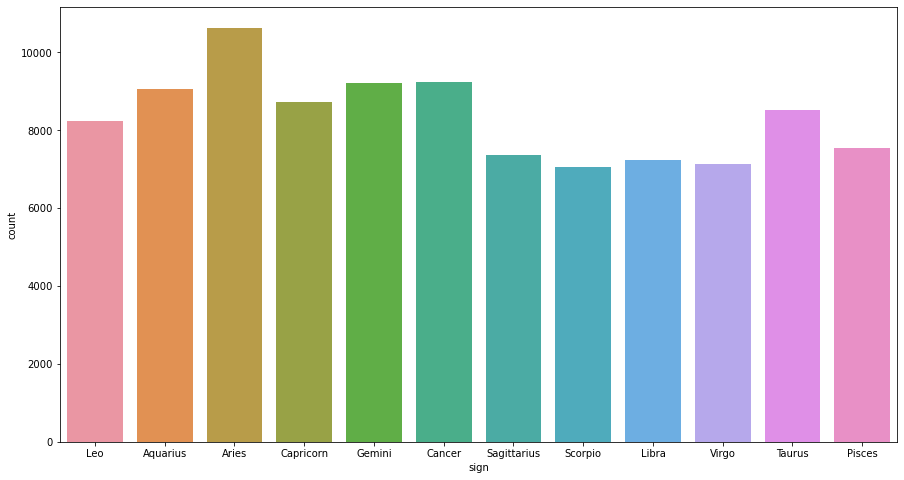

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(x='sign',data=blog_df)

<AxesSubplot:xlabel='age', ylabel='count'>

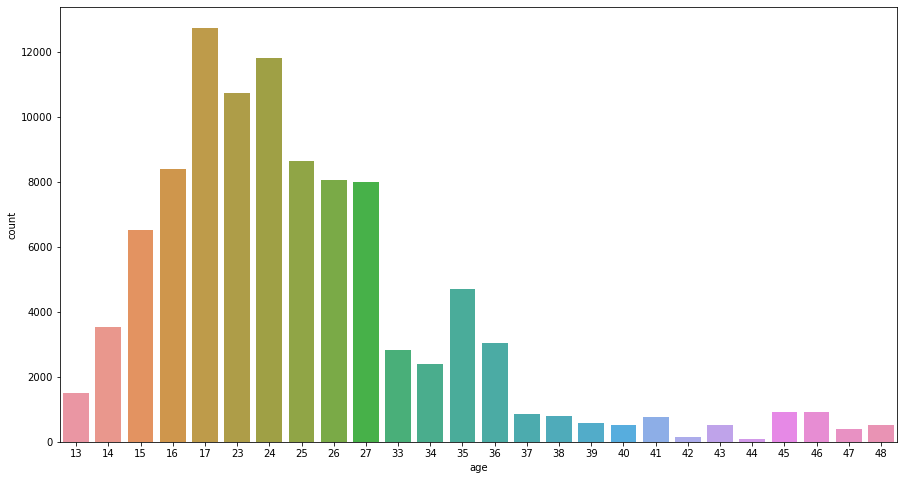

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='age',data=blog_df)

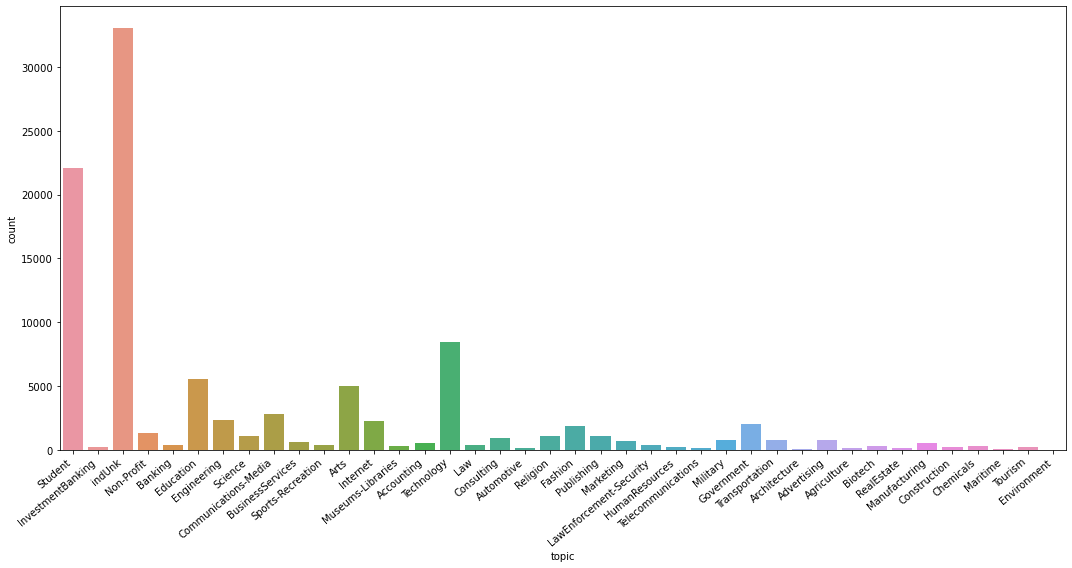

In [12]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='topic',data=blog_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [13]:
a = blog_df.topic.value_counts().index.tolist()
print(a)

['indUnk', 'Student', 'Technology', 'Education', 'Arts', 'Communications-Media', 'Engineering', 'Internet', 'Government', 'Fashion', 'Non-Profit', 'Science', 'Religion', 'Publishing', 'Consulting', 'Military', 'Advertising', 'Transportation', 'Marketing', 'BusinessServices', 'Manufacturing', 'Accounting', 'Sports-Recreation', 'LawEnforcement-Security', 'Law', 'Banking', 'Biotech', 'Museums-Libraries', 'Chemicals', 'Tourism', 'Construction', 'InvestmentBanking', 'HumanResources', 'Agriculture', 'Telecommunications', 'RealEstate', 'Automotive', 'Architecture', 'Maritime', 'Environment']


In [14]:
len(a)

40

The dataset has equal number of male and female bloggers with nearly equal number of 'sign'. There are nearly fourty topic discussed in the blogs. Most of them are independent/unknown. Ages are normally distributed with right skewed mostly between 15 and 27.

### Missing values

In [15]:
blog_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

There is no missing values in the dataset

### Eliminating non english textual data

In [16]:
blog_df.text[0:10]

0               Info has been found (+/- 100 pages,...
1               These are the team members:   Drewe...
2               In het kader van kernfusie op aarde...
3                     testing!!!  testing!!!          
4                 Thanks to Yahoo!'s Toolbar I can ...
5                 I had an interesting conversation...
6                 Somehow Coca-Cola has a way of su...
7                 If anything, Korea is a country o...
8                 Take a read of this news article ...
9                 I surf the English news sites a l...
Name: text, dtype: object

In [17]:
pattern = '[^A-Za-z0-9]+'
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern," ",s))

In [18]:
blog_df.text[0:10]

0     Info has been found 100 pages and 4 5 MB of p...
1     These are the team members Drewes van der Laa...
2     In het kader van kernfusie op aarde MAAK JE E...
3                                     testing testing 
4     Thanks to Yahoo s Toolbar I can now capture t...
5     I had an interesting conversation with my Dad...
6     Somehow Coca Cola has a way of summing up thi...
7     If anything Korea is a country of extremes Ev...
8     Take a read of this news article from urlLink...
9     I surf the English news sites a lot looking f...
Name: text, dtype: object

# Data Cleaning

In [19]:
pattern = '[^A-Za-z]+'
blog_df.text = blog_df.text.apply(lambda s : re.sub(pattern," ",s))

In [20]:
blog_df.text = blog_df.text.apply(lambda s: s.lower())

In [21]:
blog_df.text = blog_df.text.apply(lambda s: s.strip())

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arunv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stopwords=set(stopwords.words('english'))

In [24]:
blog_df.text = blog_df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]))

In [25]:
blog_df.text[0:10]

0    info found pages mb pdf files wait untill team...
1    team members drewes van der laag urllink mail ...
2    het kader van kernfusie op aarde maak je eigen...
3                                      testing testing
4    thanks yahoo toolbar capture urls popups means...
5    interesting conversation dad morning talking k...
6    somehow coca cola way summing things well earl...
7    anything korea country extremes everything see...
8    take read news article urllink joongang ilbo n...
9    surf english news sites lot looking tidbits ko...
Name: text, dtype: object

In [26]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found pages mb pdf files wait untill team...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoo toolbar capture urls popups means...


## Train and Test split

In [27]:
X = blog_df.text
y = blog_df.topic

In [28]:
print(X.shape)
print(y.shape)

(100000,)
(100000,)


In [29]:
X[0]

'info found pages mb pdf files wait untill team leader processed learns html'

In [30]:
y[0]

'Student'

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
labelencoder = LabelEncoder()

In [33]:
y = labelencoder.fit_transform(list(y))

In [34]:
list(labelencoder.classes_)

['Accounting',
 'Advertising',
 'Agriculture',
 'Architecture',
 'Arts',
 'Automotive',
 'Banking',
 'Biotech',
 'BusinessServices',
 'Chemicals',
 'Communications-Media',
 'Construction',
 'Consulting',
 'Education',
 'Engineering',
 'Environment',
 'Fashion',
 'Government',
 'HumanResources',
 'Internet',
 'InvestmentBanking',
 'Law',
 'LawEnforcement-Security',
 'Manufacturing',
 'Maritime',
 'Marketing',
 'Military',
 'Museums-Libraries',
 'Non-Profit',
 'Publishing',
 'RealEstate',
 'Religion',
 'Science',
 'Sports-Recreation',
 'Student',
 'Technology',
 'Telecommunications',
 'Tourism',
 'Transportation',
 'indUnk']

In [35]:
y[0:100]

array([34, 34, 34, 34, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 34, 34, 34],
      dtype=int64)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, random_state=42, test_size = 0.2)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000,)
(80000,)
(20000,)
(20000,)


# Count Vectorizer

In [38]:
X_test[1]

'well hope great evening take online test tomorrow wish luck good night good one ms walk looking forward'

In [39]:
y_train[0:20]

array([13,  1, 39, 39, 34, 39, 34, 34, 34, 39, 14, 13, 13, 34, 10, 35,  4,
       23,  4, 34], dtype=int64)

### Count vectorizer

In [40]:
cvect = CountVectorizer(binary = True, ngram_range=(1,2))

In [41]:
X_train_cv = cvect.fit_transform(X_train)
X_test_cv = cvect.transform(X_test)

In [42]:
cvect.get_feature_names()[0:20]

['aa',
 'aa advert',
 'aa alexisonfire',
 'aa anyway',
 'aa back',
 'aa batteries',
 'aa beautiful',
 'aa big',
 'aa brown',
 'aa button',
 'aa car',
 'aa charge',
 'aa class',
 'aa coming',
 'aa compared',
 'aa damn',
 'aa done',
 'aa eating',
 'aa end',
 'aa ended']

In [43]:
type(X_train_cv)

scipy.sparse.csr.csr_matrix

In [44]:
len(cvect.vocabulary_)

4156166

In [45]:
X_train_cv[0:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
print(X_train_cv)

  (0, 699383)	1
  (0, 874384)	1
  (0, 3417151)	1
  (0, 2181632)	1
  (0, 3463142)	1
  (0, 2473844)	1
  (0, 1192107)	1
  (0, 1593071)	1
  (0, 905101)	1
  (0, 153398)	1
  (0, 3722979)	1
  (0, 1408629)	1
  (0, 3455786)	1
  (0, 3590743)	1
  (0, 2654020)	1
  (0, 2111230)	1
  (0, 3641481)	1
  (0, 1218583)	1
  (0, 2283213)	1
  (0, 1477502)	1
  (0, 3629403)	1
  (0, 2451916)	1
  (0, 850582)	1
  (0, 2229634)	1
  (0, 2988010)	1
  :	:
  (79999, 465661)	1
  (79999, 1890743)	1
  (79999, 1889345)	1
  (79999, 1893819)	1
  (79999, 2704262)	1
  (79999, 850170)	1
  (79999, 1947606)	1
  (79999, 1582219)	1
  (79999, 127409)	1
  (79999, 1954972)	1
  (79999, 3787395)	1
  (79999, 1029775)	1
  (79999, 268185)	1
  (79999, 2225681)	1
  (79999, 1828083)	1
  (79999, 1113573)	1
  (79999, 2454486)	1
  (79999, 2455114)	1
  (79999, 127277)	1
  (79999, 1835239)	1
  (79999, 350314)	1
  (79999, 2390927)	1
  (79999, 2165996)	1
  (79999, 1604066)	1
  (79999, 1448738)	1


In [47]:
print(X_test_cv)

  (0, 303439)	1
  (0, 856970)	1
  (0, 2410562)	1
  (0, 2418030)	1
  (0, 2642400)	1
  (0, 2643153)	1
  (0, 2685958)	1
  (0, 3849965)	1
  (0, 3861824)	1
  (0, 3876330)	1
  (1, 1140065)	1
  (1, 1141098)	1
  (1, 1338185)	1
  (1, 1488246)	1
  (1, 1491404)	1
  (1, 1491488)	1
  (1, 1520654)	1
  (1, 1521663)	1
  (1, 1684780)	1
  (1, 1685705)	1
  (1, 2115855)	1
  (1, 2116652)	1
  (1, 2147094)	1
  (1, 2147370)	1
  (1, 2366312)	1
  :	:
  (19999, 856970)	1
  (19999, 857966)	1
  (19999, 1109757)	1
  (19999, 1177014)	1
  (19999, 1330695)	1
  (19999, 1331102)	1
  (19999, 1378083)	1
  (19999, 1378468)	1
  (19999, 1383826)	1
  (19999, 1386542)	1
  (19999, 1979899)	1
  (19999, 1980195)	1
  (19999, 2102387)	1
  (19999, 2263203)	1
  (19999, 2737640)	1
  (19999, 3232332)	1
  (19999, 3680943)	1
  (19999, 3688205)	1
  (19999, 3689030)	1
  (19999, 3690176)	1
  (19999, 3719963)	1
  (19999, 3841993)	1
  (19999, 4023030)	1
  (19999, 4023682)	1
  (19999, 4121834)	1


## Model building (Count vectorizer)

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import SGDClassifier

In [49]:
clf = MultinomialNB()

In [50]:
svm = SGDClassifier()

In [51]:
print("X_train: ", X_train_cv.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test_cv.shape)
print("y_test: ", y_test.shape)

X_train:  (80000, 4156166)
y_train:  (80000,)
X_test:  (20000, 4156166)
y_test:  (20000,)


#### Multinomial naive bayes

In [52]:
clf.fit(X_train_cv, y_train)

MultinomialNB()

In [53]:
Ypred = clf.predict(X_test_cv)

In [54]:
print('Accuracy score: ', accuracy_score(y_test, Ypred))
print('F1 score: ', f1_score(y_test, Ypred, average='micro'))
print('Precision score: ', precision_score(y_test, Ypred, average='micro'))
print('Recall score: ', recall_score(y_test, Ypred, average='micro'))

Accuracy score:  0.39225
F1 score:  0.39224999999999993
Precision score:  0.39225
Recall score:  0.39225


#### Support vector classifier

In [55]:
svm.fit(X_train_cv,y_train)

SGDClassifier()

In [56]:
Ypred1 = svm.predict(X_test_cv)

In [57]:
print('Accuracy score: ', accuracy_score(y_test, Ypred1))
print('F1 score: ', f1_score(y_test, Ypred1, average='micro'))
print('Precision score: ', precision_score(y_test, Ypred1, average='micro'))
print('Recall score: ', recall_score(y_test, Ypred1, average='micro'))

Accuracy score:  0.48695
F1 score:  0.48695
Precision score:  0.48695
Recall score:  0.48695


## Model building(tdidf)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer(ngram_range=(1, 2))

In [59]:
X_train_tv = tvect.fit_transform(X_train)
X_test_tv = tvect.transform(X_test)

In [60]:
tvect.get_feature_names()[0:10]

['aa',
 'aa advert',
 'aa alexisonfire',
 'aa anyway',
 'aa back',
 'aa batteries',
 'aa beautiful',
 'aa big',
 'aa brown',
 'aa button']

In [61]:
len(tvect.vocabulary_)

4156166

In [62]:
print(X_train_tv[0])

  (0, 3132450)	0.1037646882043783
  (0, 1512584)	0.09704671597205655
  (0, 1464610)	0.12300689220522532
  (0, 3683801)	0.07166209475035851
  (0, 120367)	0.08505885970537329
  (0, 2937570)	0.12120068788628474
  (0, 2004183)	0.12775778159647128
  (0, 1327721)	0.11963608253817447
  (0, 979317)	0.12514317849138532
  (0, 4119837)	0.11702147943308851
  (0, 701451)	0.13112859126352214
  (0, 1815627)	0.13587948065476807
  (0, 1039756)	0.13587948065476807
  (0, 2540796)	0.11227059004184253
  (0, 2543964)	0.07439939148914383
  (0, 678688)	0.1088997803747917
  (0, 201391)	0.13587948065476807
  (0, 1498802)	0.12514317849138532
  (0, 3180132)	0.12775778159647128
  (0, 1223520)	0.13112859126352214
  (0, 1161695)	0.13112859126352214
  (0, 1975517)	0.11702147943308851
  (0, 3557148)	0.10832809943674199
  (0, 2521950)	0.11825600281397936
  (0, 2170149)	0.12775778159647128
  :	:
  (0, 2988010)	0.07626742779830023
  (0, 2229634)	0.03824447097334365
  (0, 850582)	0.029314936804995025
  (0, 2451916)	0.0375

In [63]:
print(X_train_tv[0:5].toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [64]:
print("X_train: ", X_train_tv.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test_tv.shape)
print("y_test: ", y_test.shape)

X_train:  (80000, 4156166)
y_train:  (80000,)
X_test:  (20000, 4156166)
y_test:  (20000,)


#### Multinomial naive bayes

In [66]:
clf.fit(X_train_tv, y_train)

MultinomialNB()

In [67]:
y_pred = clf.predict(X_test_tv)

In [68]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))

Accuracy score:  0.34895
F1 score:  0.34895
Precision score:  0.34895
Recall score:  0.34895


#### Support vector classfier

In [69]:
svm.fit(X_train_tv,y_train)

SGDClassifier()

In [70]:
y_pred1 = svm.predict(X_test_tv)

In [71]:
print('Accuracy score: ', accuracy_score(y_test, y_pred1))
print('F1 score: ', f1_score(y_test, y_pred1, average='micro'))
print('Precision score: ', precision_score(y_test, y_pred1, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred1, average='micro'))

Accuracy score:  0.51725
F1 score:  0.51725
Precision score:  0.51725
Recall score:  0.51725


# Predictions

In [72]:
y_test_inversed = labelencoder.inverse_transform(y_test)

In [73]:
Ypred_inversed = labelencoder.inverse_transform(y_pred1)

In [81]:
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test[i],
        y_test_inversed[i],
        Ypred_inversed[i]
    ))

Text:	urllink uses pay phones days beaverton nbsp urllink
True labels:	Marketing
Predicted labels:	indUnk


Text:	well hope great evening take online test tomorrow wish luck good night good one ms walk looking forward
True labels:	Student
Predicted labels:	Student


Text:	e
True labels:	Consulting
Predicted labels:	indUnk


Text:	feel miserable day work got msg going zouk call muz send hurting msgs miss guess busy think juz invisible
True labels:	Manufacturing
Predicted labels:	indUnk


Text:	well tot today would nice dae dat stupid peijun spoil good day woke early come skool enjoy basketball match klass game hell fun scored first one almost scored three pointer ball hit rim go rebounce hard den bounce crap haha recess found amanda leaving bad la shes gonna cum bak december goin ice skating championships pro worx shall wish good luck come bak prize okies recess dat bitchy jun go tell tan ask shanx tok wat crap shanx also dowan tok siaozer betray frist ppl forgif liaos tok nicely nbsp s

## Performance

1. Tdidf performed better because it penalizes more for a word which is repeated over maximum number of documents and gives importance to a word that is often repeated in the same document, which means the key word. 

2. SVM with SGD training:\
This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

Accuracy score is given more importance for the best model predictions

# GL chatbot

In [82]:
import json

In [83]:
with open('glbot.json') as f:
    corpus = json.load(f)

In [84]:
print(corpus)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [85]:
type(corpus)

dict

In [86]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arunv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
corpus['intents']

[{'tag': 'Intro',
  'patterns': ['hi',
   'how are you',
   'is anyone there',
   'hello',
   'whats up',
   'hey',
   'yo',
   'listen',
   'please help me',
   'i am learner from',
   'i belong to',
   'aiml batch',
   'aifl batch',
   'i am from',
   'my pm is',
   'blended',
   'online',
   'i am from',
   'hey ya',
   'talking to you for first time'],
  'responses': ['Hello! how can i help you ?'],
  'context_set': ''},
 {'tag': 'Exit',
  'patterns': ['thank you',
   'thanks',
   'cya',
   'see you',
   'later',
   'see you later',
   'goodbye',
   'i am leaving',
   'have a Good day',
   'you helped me',
   'thanks a lot',
   'thanks a ton',
   'you are the best',
   'great help',
   'too good',
   'you are a good learning buddy'],
  'responses': ['I hope I was able to assist you, Good Bye'],
  'context_set': ''},
 {'tag': 'Olympus',
  'patterns': ['olympus',
   'explain me how olympus works',
   'I am not able to understand olympus',
   'olympus window not working',
   'no acces

In [88]:
W = []  # Tokens
L = []  # Labels
doc_x = [] # sentence tokens
doc_y = [] 

for intent in corpus['intents']:
    for pattern in intent['patterns']:
        w_temp = nltk.word_tokenize(pattern)
        W.extend(w_temp)
        doc_x.append(w_temp)
        doc_y.append(intent['tag'])

    if intent['tag'] not in L:
        L.append(intent['tag'])

In [89]:
print(W)

['hi', 'how', 'are', 'you', 'is', 'anyone', 'there', 'hello', 'whats', 'up', 'hey', 'yo', 'listen', 'please', 'help', 'me', 'i', 'am', 'learner', 'from', 'i', 'belong', 'to', 'aiml', 'batch', 'aifl', 'batch', 'i', 'am', 'from', 'my', 'pm', 'is', 'blended', 'online', 'i', 'am', 'from', 'hey', 'ya', 'talking', 'to', 'you', 'for', 'first', 'time', 'thank', 'you', 'thanks', 'cya', 'see', 'you', 'later', 'see', 'you', 'later', 'goodbye', 'i', 'am', 'leaving', 'have', 'a', 'Good', 'day', 'you', 'helped', 'me', 'thanks', 'a', 'lot', 'thanks', 'a', 'ton', 'you', 'are', 'the', 'best', 'great', 'help', 'too', 'good', 'you', 'are', 'a', 'good', 'learning', 'buddy', 'olympus', 'explain', 'me', 'how', 'olympus', 'works', 'I', 'am', 'not', 'able', 'to', 'understand', 'olympus', 'olympus', 'window', 'not', 'working', 'no', 'access', 'to', 'olympus', 'unable', 'to', 'see', 'link', 'in', 'olympus', 'no', 'link', 'visible', 'on', 'olympus', 'whom', 'to', 'contact', 'for', 'olympus', 'lot', 'of', 'proble

In [90]:
print(L)

['Intro', 'Exit', 'Olympus', 'SL', 'NN', 'Bot', 'Profane', 'Ticket']


In [91]:
print(doc_x)

[['hi'], ['how', 'are', 'you'], ['is', 'anyone', 'there'], ['hello'], ['whats', 'up'], ['hey'], ['yo'], ['listen'], ['please', 'help', 'me'], ['i', 'am', 'learner', 'from'], ['i', 'belong', 'to'], ['aiml', 'batch'], ['aifl', 'batch'], ['i', 'am', 'from'], ['my', 'pm', 'is'], ['blended'], ['online'], ['i', 'am', 'from'], ['hey', 'ya'], ['talking', 'to', 'you', 'for', 'first', 'time'], ['thank', 'you'], ['thanks'], ['cya'], ['see', 'you'], ['later'], ['see', 'you', 'later'], ['goodbye'], ['i', 'am', 'leaving'], ['have', 'a', 'Good', 'day'], ['you', 'helped', 'me'], ['thanks', 'a', 'lot'], ['thanks', 'a', 'ton'], ['you', 'are', 'the', 'best'], ['great', 'help'], ['too', 'good'], ['you', 'are', 'a', 'good', 'learning', 'buddy'], ['olympus'], ['explain', 'me', 'how', 'olympus', 'works'], ['I', 'am', 'not', 'able', 'to', 'understand', 'olympus'], ['olympus', 'window', 'not', 'working'], ['no', 'access', 'to', 'olympus'], ['unable', 'to', 'see', 'link', 'in', 'olympus'], ['no', 'link', 'visib

In [92]:
print(doc_y)

['Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Tick

In [93]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [94]:
W = [stemmer.stem(w.lower()) for w in W if w != '?']
W = sorted(list(set(W)))
L = sorted(L)

In [95]:
W[0:10]

['a', 'abl', 'access', 'activ', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an']

In [96]:
L

['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']

In [97]:
Train = []
Target = []

out_empty = [0 for _ in range(len(L))]

In [98]:
for x, doc in enumerate(doc_x):
    bag = []
    
    w_temp = [stemmer.stem(w.lower()) for w in doc]
    
    for w in W:
        if w in w_temp:
            bag.append(1)
        else:
            bag.append(0)
            
    output_row = out_empty[:]
    output_row[L.index(doc_y[x])] = 1
    
    Train.append(bag)
    Target.append(output_row)

In [99]:
len(Train[0])

154

In [100]:
Target[0:2]

[[0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0]]

## model building

In [101]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [102]:
model = Sequential()
model.add(Dense(64,input_dim = len(Train[0]), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(len(Target[0]), activation = 'softmax'))

In [103]:
model.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                9920      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 12,520
Trainable params: 12,392
Non-trainable params: 128
_________________________________________________________________


In [105]:
model.fit(Train,Target, epochs=20, batch_size=10, verbose=2)

Epoch 1/20
13/13 - 1s - loss: 2.3569 - accuracy: 0.1250 - 527ms/epoch - 41ms/step
Epoch 2/20
13/13 - 0s - loss: 2.0043 - accuracy: 0.2031 - 31ms/epoch - 2ms/step
Epoch 3/20
13/13 - 0s - loss: 1.6385 - accuracy: 0.4219 - 27ms/epoch - 2ms/step
Epoch 4/20
13/13 - 0s - loss: 1.4300 - accuracy: 0.5703 - 39ms/epoch - 3ms/step
Epoch 5/20
13/13 - 0s - loss: 1.2226 - accuracy: 0.6328 - 39ms/epoch - 3ms/step
Epoch 6/20
13/13 - 0s - loss: 1.1245 - accuracy: 0.6953 - 34ms/epoch - 3ms/step
Epoch 7/20
13/13 - 0s - loss: 1.0160 - accuracy: 0.7188 - 34ms/epoch - 3ms/step
Epoch 8/20
13/13 - 0s - loss: 0.8791 - accuracy: 0.7969 - 32ms/epoch - 2ms/step
Epoch 9/20
13/13 - 0s - loss: 0.8167 - accuracy: 0.8125 - 24ms/epoch - 2ms/step
Epoch 10/20
13/13 - 0s - loss: 0.7590 - accuracy: 0.8516 - 29ms/epoch - 2ms/step
Epoch 11/20
13/13 - 0s - loss: 0.6521 - accuracy: 0.9062 - 35ms/epoch - 3ms/step
Epoch 12/20
13/13 - 0s - loss: 0.5361 - accuracy: 0.9375 - 33ms/epoch - 3ms/step
Epoch 13/20
13/13 - 0s - loss: 0.50

In [106]:
def bag_of_words(text, W):
    bag = []
    token = nltk.word_tokenize(text)
    w_temp = [stemmer.stem(w.lower()) for w in token]
    
    for w in W:
        if w in w_temp:
            bag.append(1)
        else:
            bag.append(0)
    return bag

In [111]:
import numpy
import random
def chat():
    print("Chat with GL BOT")
    print("Type 'quit' to stop, If answer is not right type '*'")
    while True:
        inp = input("\nYOU: ")
        if inp.lower() == '*':
            print("BOT: please rephrase your question and try again")
        if inp.lower() == 'quit':
            break

        results = model.predict([bag_of_words(inp,W)])
        results_index = numpy.argmax(results)
        tag = L[results_index]

        for tg in corpus["intents"]:
            if tg['tag'] == tag:
                responses = tg['responses']
    
        print(random.choice(responses))

In [112]:
chat()

Chat with GL BOT
Type 'quit' to stop, If answer is not right type '*'

YOU: hi
1/1 [==============================] - 0s 24ms/step
Hello! how can i help you ?

YOU: explain about olympus
1/1 [==============================] - 0s 31ms/step
Link: Olympus wiki

YOU: explain aboutdeep learning
1/1 [==============================] - 0s 28ms/step
Link: Machine Learning wiki 

YOU: i am not able to understand random forest
1/1 [==============================] - 0s 31ms/step
Link: Machine Learning wiki 

YOU: computer vision
1/1 [==============================] - 0s 23ms/step
Link: Machine Learning wiki 

YOU: i hate you
1/1 [==============================] - 0s 32ms/step
Please use respectful words

YOU: explain about epochs
1/1 [==============================] - 0s 38ms/step
Link: Neural Nets wiki

YOU: quit
